In [ ]:
import pandas as pd

In [ ]:
# import Dataset
Credit_Card_Data = pd.read_csv('/content/drive/MyDrive/K_means/Credit Card Customer Data.csv')
Credit_Card_Data.head()

#The data appeared consists of a set of features.
#The serial number will be ignored so the first one has no value.

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
#Ignoring the first column and stores the data in the df variable.
#Also Ignoring the customer's key column because it has no effect on the data so we drop both of them.
df = Credit_Card_Data.drop(columns=['Sl_No','Customer Key'])
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [ ]:
# The number of lines is 660 and the number of feature is 5.
df.shape

(660, 5)

In [ ]:
#Displaying the description of data.
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


In [ ]:
#Displaying the database information.
df.info()
#The data is ready because all data is numerical values and there are no empty values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


In [ ]:
# Data Cleaning && Preprocessing.
# Handle missing values if there are empty values it fills them.
# Remove duplicates if there are duplicate values we remove them.
df.drop_duplicates(inplace=True)

df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


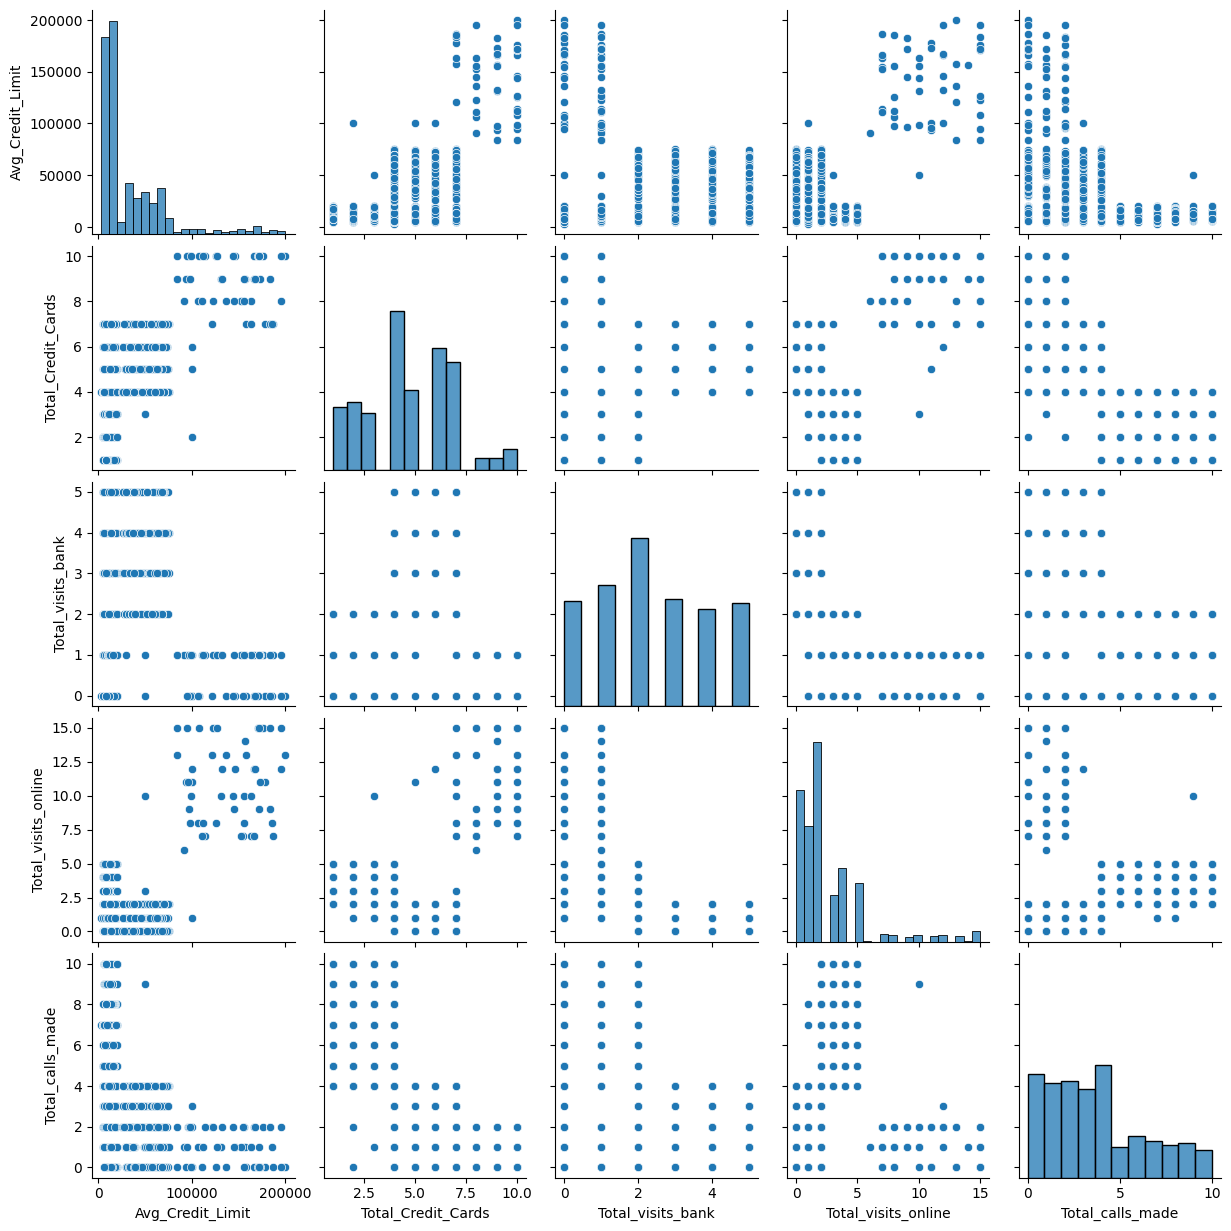

In [ ]:
# Visualizing on the Dataset.
import seaborn as sns
import matplotlib.pyplot as plt


# Create a pair plot.
sns.pairplot(df)
plt.show()

# I drew the correlations between each column and the other within the database resulting in the following drawing.

In [ ]:
#k-Means Clustering on the training set
from sklearn.cluster import KMeans
# import time module to calc classification time in second
import time

#Normalized Mutual Information (NMI).
from sklearn.metrics.cluster import normalized_mutual_info_score

#Silhouette_score
from sklearn.metrics import silhouette_score

#Adjusted_rand_score
from sklearn.metrics import adjusted_rand_score


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

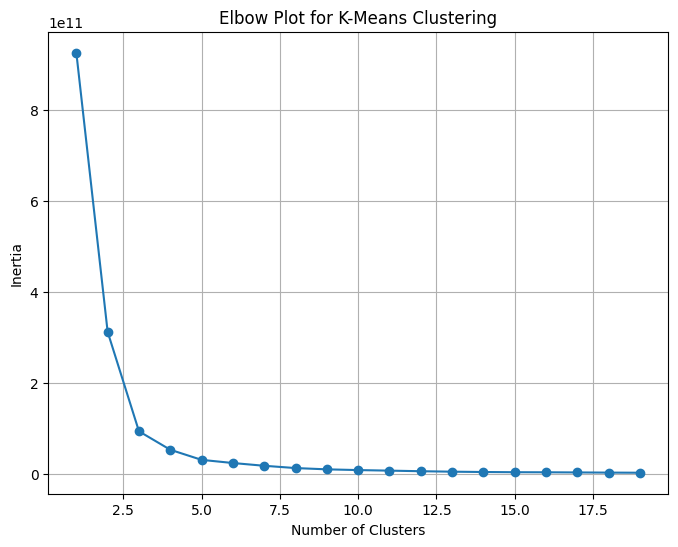

In [ ]:
#Create a empty list at the beginning to hold the cost (inertia) for various cluster sizes.
inertia = []

#Select a range for k values and use the elbow method to select the best value of k then plot th elbow figure.
#Choosing the range between 1 to 20.
cluster_range = range(1,20)

# Calculating the inertia for each cluster size.
for k in cluster_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Create an elbow plot
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Plot for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [ ]:
# Running the k-means 10 times and reporting the time.

# Make a list to hold the WCSS values for various cluster counts (k) and within the cluster sum of squares.

inertia = []
# We will calculate the Within-cluster sum of squares.

#Run k-means 10 times.
run_num = range(1,11)
for k in run_num:
    start_time = time.time()
    # K=5 as we mentioned before.
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    end_time = time.time()
    elapsed_time = end_time - start_time

    inertia.append(km.inertia_)


    print("Iteration number : ",k)
    print(f"Elapsed time   : {elapsed_time} seconds")
    print("Within-cluster sum of squares = ",km.inertia_)
    print("=================================== \n")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration number :  1
Elapsed time   : 0.9709699153900146 seconds
Within-cluster sum of squares =  926561399457.818



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration number :  2
Elapsed time   : 0.9451742172241211 seconds
Within-cluster sum of squares =  312176337774.27875



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration number :  3
Elapsed time   : 0.33259057998657227 seconds
Within-cluster sum of squares =  93398770095.20325



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration number :  4
Elapsed time   : 1.6677615642547607 seconds
Within-cluster sum of squares =  52856382551.28136



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration number :  5
Elapsed time   : 1.0201399326324463 seconds
Within-cluster sum of squares =  30470332728.387344



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration number :  6
Elapsed time   : 1.3655483722686768 seconds
Within-cluster sum of squares =  23476642048.893757



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration number :  7
Elapsed time   : 1.0457639694213867 seconds
Within-cluster sum of squares =  17446559899.997448

Iteration number :  8
Elapsed time   : 0.054569244384765625 seconds
Within-cluster sum of squares =  12503969644.067047

Iteration number :  9
Elapsed time   : 0.03616166114807129 seconds
Within-cluster sum of squares =  9597923886.763912

Iteration number :  10
Elapsed time   : 0.03297901153564453 seconds
Within-cluster sum of squares =  7853216747.746198



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
